# 0 - Data Overview

In [168]:
# !pip install missingno

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import os

In [14]:
df = pd.read_csv('raw_data.csv')

## Shape of data

In [15]:
df.shape

(79994, 20)

In [16]:
df.describe()

,Rating
count,74196.000000
mean,5.950356
std,1.266200
min,1.000000
25%,5.200000
50%,6.100000
75%,6.800000
max,10.000000


## Feature data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79994 entries, 0 to 79993
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                79994 non-null  object 
 1   Title_URL            79994 non-null  object 
 2   Image                79994 non-null  object 
 3   listeritemimage_URL  79994 non-null  object 
 4   listeritemindex      79994 non-null  object 
 5   Year                 76930 non-null  object 
 6   certificate          49206 non-null  object 
 7   Time                 74207 non-null  object 
 8   genre                79464 non-null  object 
 9   Rating               74196 non-null  float64
 10  Score                18280 non-null  object 
 11  Synopsis             79994 non-null  object 
 12  Content              79991 non-null  object 
 13  Director             79702 non-null  object 
 14  Content4             78991 non-null  object 
 15  Content6             78331 non-null 

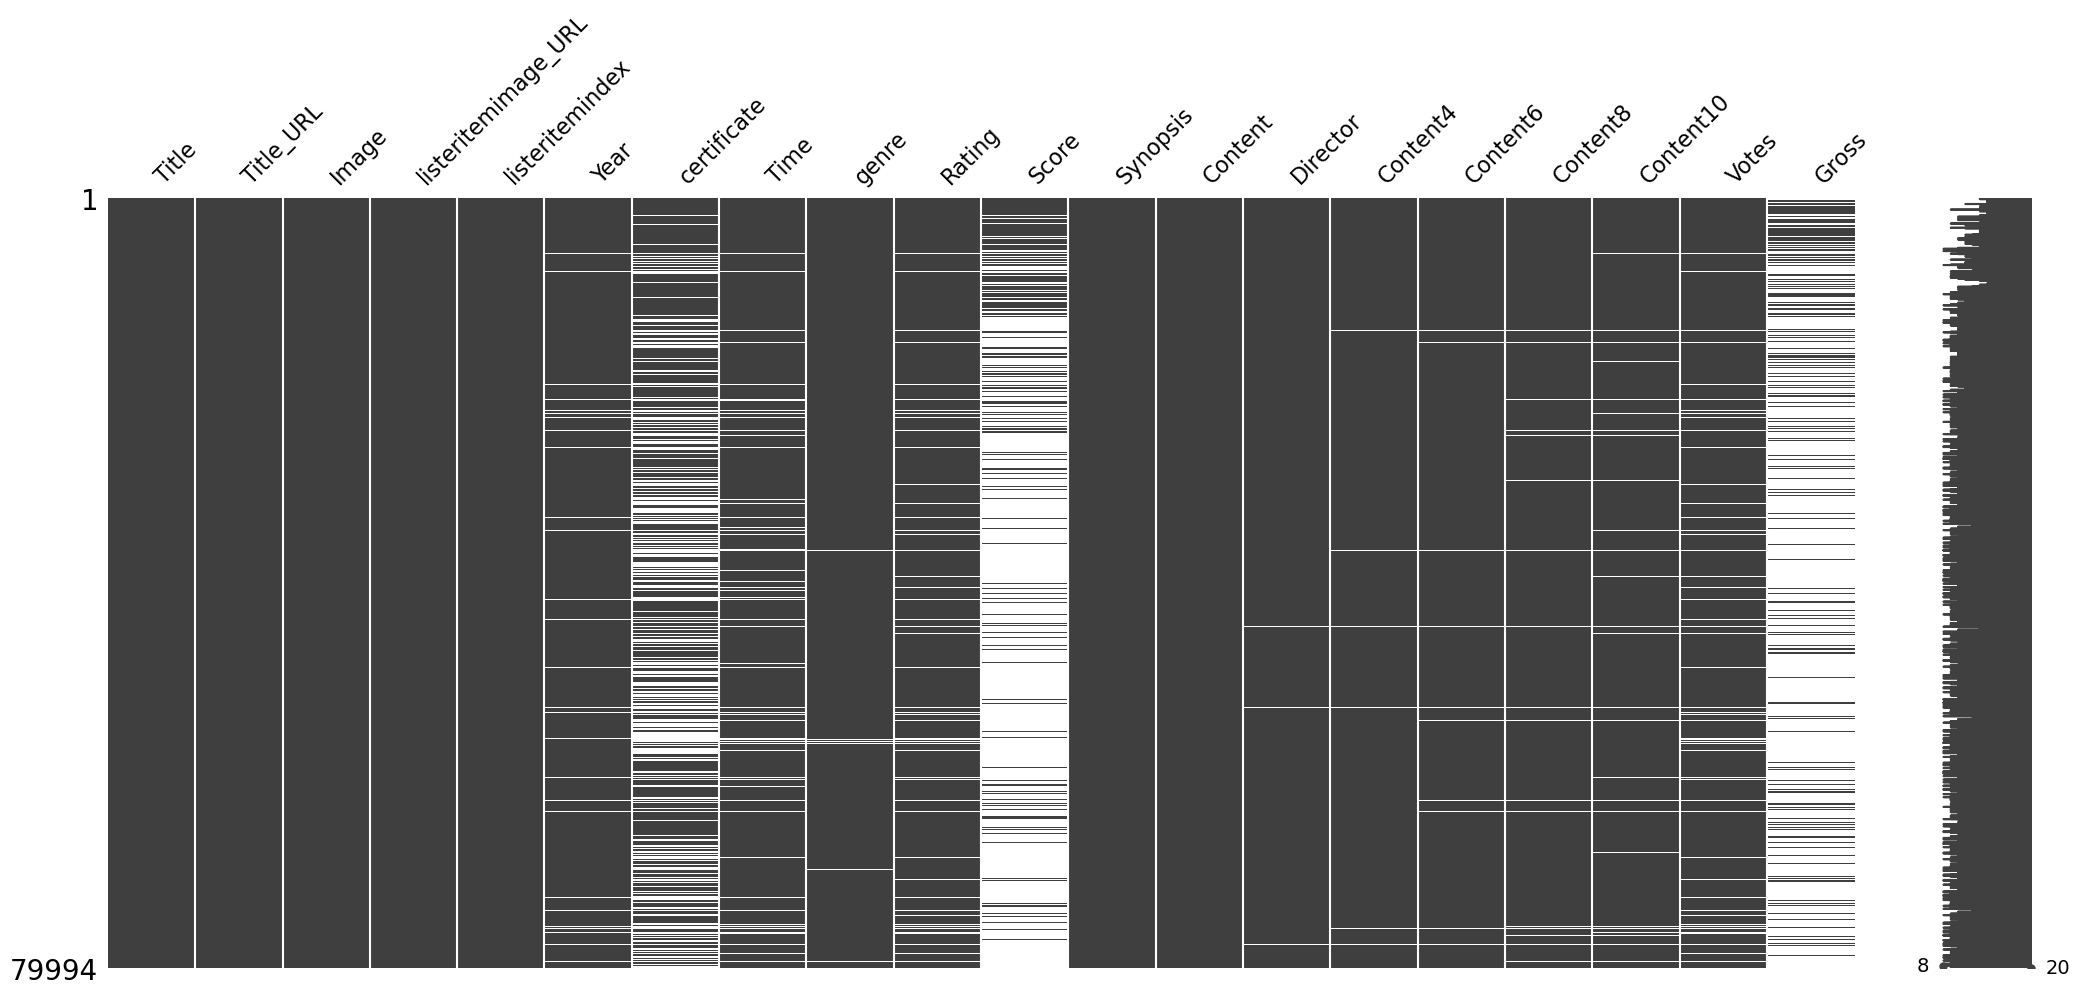

In [18]:
msno.matrix(df)
plt.savefig('Images/missing_values_matrix.png', bbox_inches='tight')

# 1 - Data Cleaning

## Columns

### Dropping unnecessary columns

In [19]:
df = df[['Title', 'genre', 'Synopsis']]

In [20]:
df.head()

,Title,genre,Synopsis
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",\nJake Sully lives with his newfound family fo...
1,The Menu,"\nHorror, Thriller",\nA young couple travels to a remote island to...
2,Babylon,"\nComedy, Drama, History",\nA tale of outsized ambition and outrageous e...
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",\nA middle-aged Chinese immigrant is swept up ...
4,M3gan,"\nHorror, Sci-Fi, Thriller",\nA robotics engineer at a toy company builds ...


### column name lowercase

In [21]:
df.columns = df.columns.str.lower()

In [22]:
df.head()

,title,genre,synopsis
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",\nJake Sully lives with his newfound family fo...
1,The Menu,"\nHorror, Thriller",\nA young couple travels to a remote island to...
2,Babylon,"\nComedy, Drama, History",\nA tale of outsized ambition and outrageous e...
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",\nA middle-aged Chinese immigrant is swept up ...
4,M3gan,"\nHorror, Sci-Fi, Thriller",\nA robotics engineer at a toy company builds ...


## Genre

### cleaning genre and adding to new_genre list

In [23]:
df.genre.isnull().sum()

530

In [24]:
df['genre'][0]

'\nAction, Adventure, Fantasy            '

In [25]:
df.dropna(subset=['genre'], inplace=True)

In [26]:
df['genre'].isnull().sum()

0

In [27]:
df['genre']

0          \nAction, Adventure, Fantasy            
1                    \nHorror, Thriller            
2              \nComedy, Drama, History            
3           \nAction, Adventure, Comedy            
4            \nHorror, Sci-Fi, Thriller            
                            ...                    
79989                \nBiography, Drama            
79990                          \nComedy            
79991    \nAnimation, Action, Adventure            
79992                  \nDrama, History            
79993                           \nDrama            
Name: genre, Length: 79464, dtype: object

In [28]:
# Clean genre data by removing whitespaces and newline characters
df['new_genre'] = df['genre'].str.replace('\s+', '').str.replace('\n', '')
df['genre'].isnull().sum()

/var/folders/t0/cy55t7gx4r9gctbwb3p_grf80000gn/T/ipykernel_3622/3529176107.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_genre'] = df['genre'].str.replace('\s+', '').str.replace('\n', '')


0

In [29]:
df.head()

,title,genre,synopsis,new_genre
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",\nJake Sully lives with his newfound family fo...,"Action,Adventure,Fantasy"
1,The Menu,"\nHorror, Thriller",\nA young couple travels to a remote island to...,"Horror,Thriller"
2,Babylon,"\nComedy, Drama, History",\nA tale of outsized ambition and outrageous e...,"Comedy,Drama,History"
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",\nA middle-aged Chinese immigrant is swept up ...,"Action,Adventure,Comedy"
4,M3gan,"\nHorror, Sci-Fi, Thriller",\nA robotics engineer at a toy company builds ...,"Horror,Sci-Fi,Thriller"


In [30]:
df.isnull().sum()

title        0
genre        0
synopsis     0
new_genre    0
dtype: int64

## Synopsis

### cleaning synopsis

In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [32]:
import re


def clean_synopsis(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+See full summary.*$', '', text)
    text = re.sub(r'\.{3}', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['synopsis'] = df['synopsis'].apply(clean_synopsis)

In [33]:
def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                       'may','also','across','among','beside','however','yet','within'])
    no_stop_words=[word for word in sentence.split() if word not in stop_words]
    no_step_sentence = ' '.join(no_stop_words)
    return no_step_sentence
df['synopsis'] = df['synopsis'].apply(remove_stop_words)

### cleaning and saving it to corpus

In [34]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# create instances of WordNetLemmatizer and PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


def clean_text(text):
    
    text = text.replace('\n', ' ')

    
    text = re.sub(r'\s+See full summary.*$', '', text)

   
    text = re.sub(r'\.{3}', '', text)

    
    text = re.sub(r'[^\w\s]', '', text).strip()

   
    text = text.lower()

   
    tokens = word_tokenize(text)

    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

# apply clean_text function to synopsis column and save to corpus column
df['corpus'] = df['synopsis'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/subashanannair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subashanannair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/subashanannair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
df.head()

,title,genre,synopsis,new_genre,corpus
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...


In [36]:
df.isnull().sum()

title        0
genre        0
synopsis     0
new_genre    0
corpus       0
dtype: int64

### Checking empty string in corpus

In [37]:
import pandas as pd
import numpy as np

def clean_df(df):

    df['new_genre'].replace('', np.nan, inplace=True)
    df.dropna(subset=['new_genre'], inplace=True)
    
    # Remove empty lists from 'new_genre' column
    df['new_genre'] = df['new_genre'].apply(lambda x: [g.strip() for g in x.split(',') if g.strip()])
    df['new_genre'] = df['new_genre'].apply(lambda x: ','.join(x) if x else np.nan)
    df.dropna(subset=['new_genre'], inplace=True)
    
    # Remove empty strings and NaN values from 'corpus' column
    df['corpus'].replace('', np.nan, inplace=True)
    df.dropna(subset=['corpus'], inplace=True)
    
    # Remove empty lists from 'corpus' column
    df['corpus'] = df['corpus'].apply(lambda x: [c.strip() for c in x.split(',') if c.strip()])
    df['corpus'] = df['corpus'].apply(lambda x: ','.join(x) if x else np.nan)
    df.dropna(subset=['corpus'], inplace=True)



In [38]:
df.head()

,title,genre,synopsis,new_genre,corpus
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...


### check for any empty strings in the dataframe

In [39]:
import pandas as pd
import numpy as np

def check_for_empty_values(df):
    
    if df.isna().values.any():
        return True
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, str) and x.isspace()).any() or \
                df[col].apply(lambda x: isinstance(x, list) and len(x) == 0).any() or \
                df[col].apply(lambda x: x == "").any():
            return True

    return False
if check_for_empty_values(df):
    print("There are empty values in the dataframe.")
else:
    print("There are no empty values in the dataframe.")

There are empty values in the dataframe.


In [35]:
df.isnull().sum()

title        0
genre        0
synopsis     0
new_genre    0
corpus       0
dtype: int64

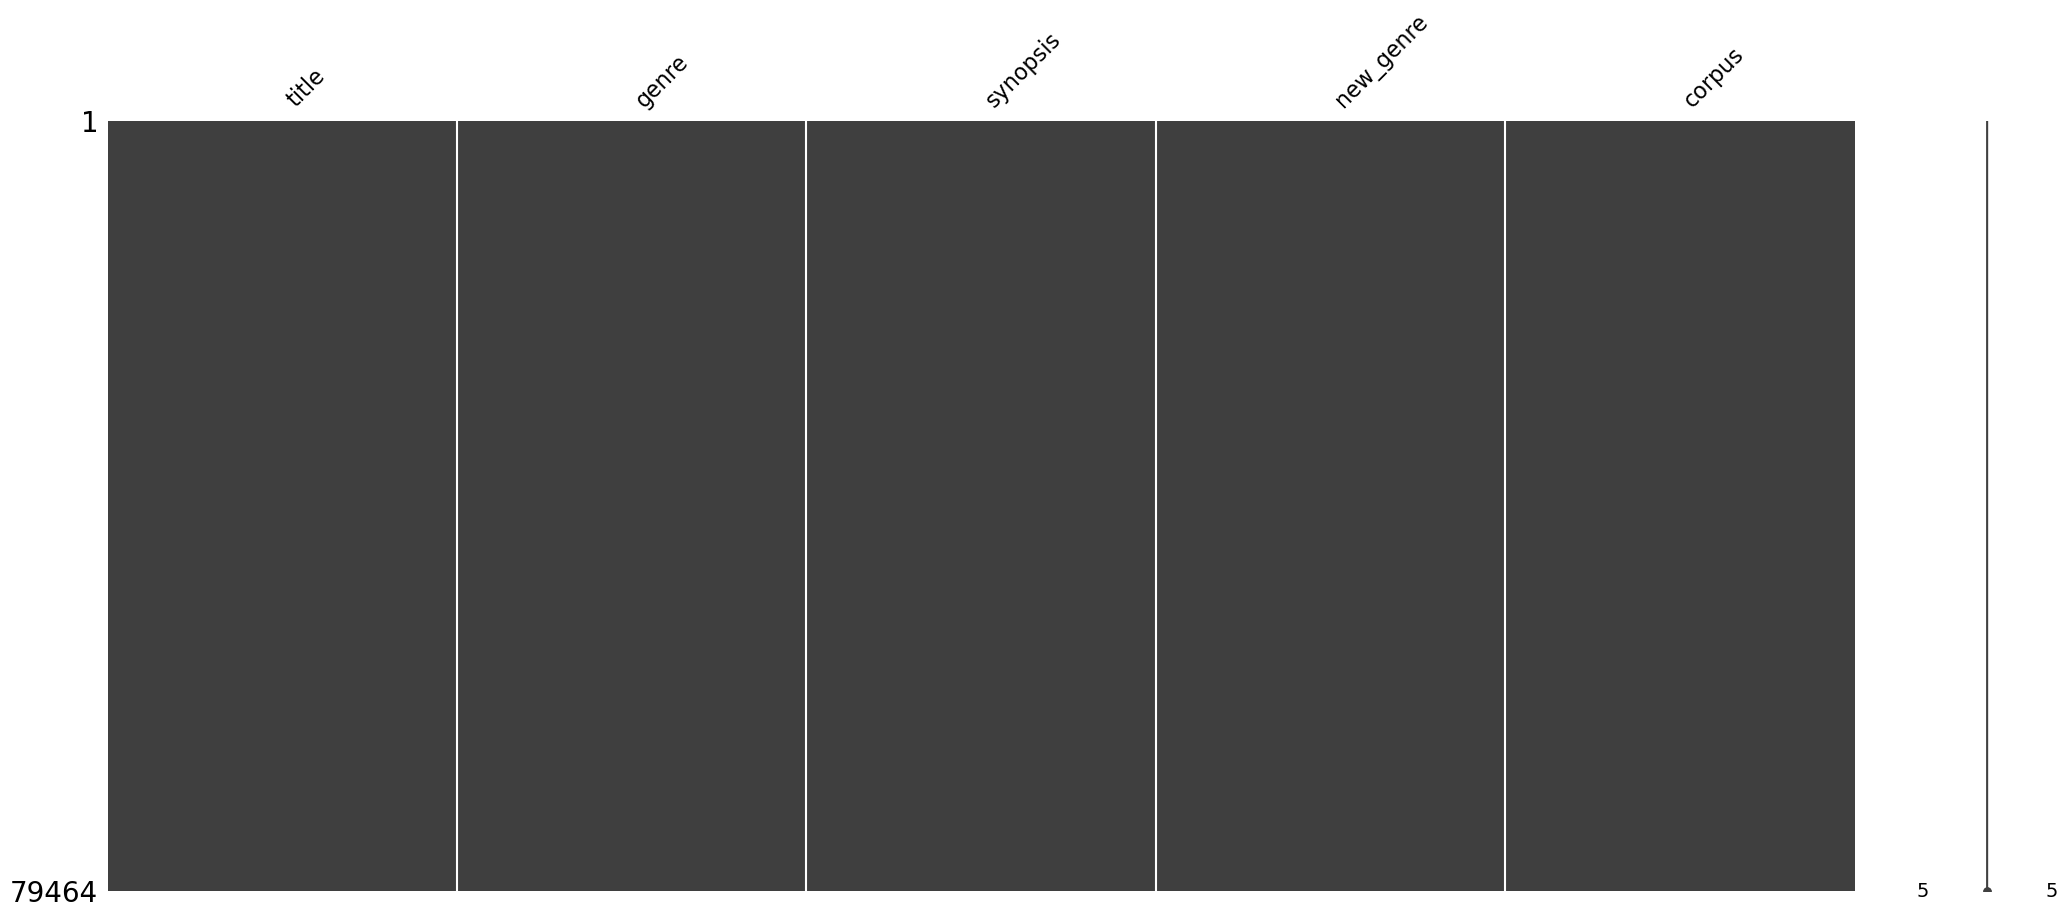

In [40]:
msno.matrix(df)
plt.savefig('Images/cleaned_values_matrix.png', bbox_inches='tight')

# 2 - EDA

## Genre

### creating genre word count for analysis

In [41]:
df.head()

,title,genre,synopsis,new_genre,corpus
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...


In [42]:
import pandas as pd

def count_genres(df):
    genre_counts = df['new_genre'].str.split(',').apply(lambda x: len(x))
    df['genre_length'] = genre_counts
    return genre_counts
count_genres(df)

0        3
1        2
2        3
3        3
4        3
        ..
79989    2
79990    1
79991    3
79992    2
79993    1
Name: new_genre, Length: 79464, dtype: int64

In [43]:
df.head()

,title,genre,synopsis,new_genre,corpus,genre_length
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...,2
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3


In [44]:
df.isnull().sum()

title           0
genre           0
synopsis        0
new_genre       0
corpus          0
genre_length    0
dtype: int64

### Movie genre analysis (single genre)

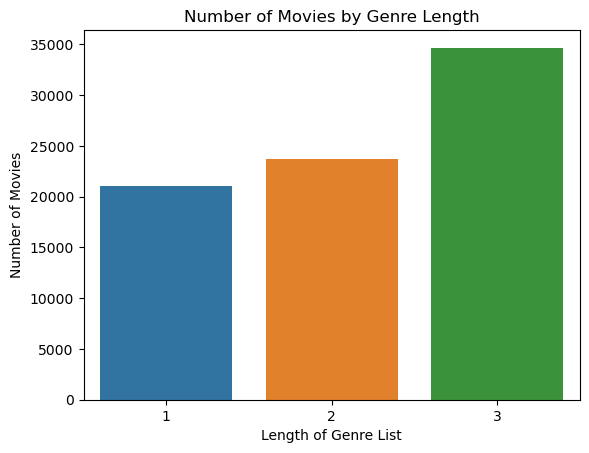

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of genres with length 1, 2, and 3
genre_counts = df['new_genre'].apply(lambda x: len(x.split(','))).value_counts()

# Plot the counts
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies by Genre Length')
plt.xlabel('Length of Genre List')
plt.ylabel('Number of Movies')
plt.savefig('Images/genre_length_counts.png', bbox_inches='tight')
plt.show()


### Movie genre analysis (multiple combo)

In [47]:
# Count the number of occurrences of each genre
genre_counts = df['new_genre'].value_counts()
print(genre_counts)

Drama                      9707
Comedy                     4495
Comedy,Drama               3198
Drama,Romance              3195
Comedy,Drama,Romance       2485
                           ... 
Drama,Thriller,Horror         1
Drama,Crime,Action            1
Comedy,Fantasy,Thriller       1
Crime,Family,Fantasy          1
Crime,Thriller,Drama          1
Name: new_genre, Length: 850, dtype: int64


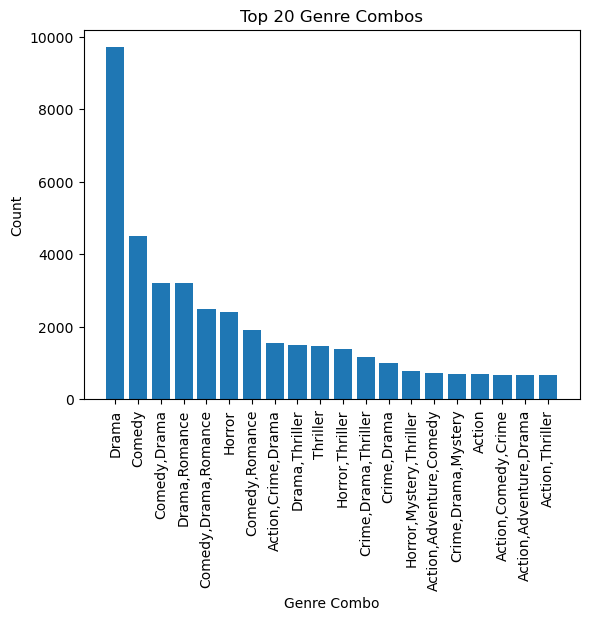

In [49]:
import matplotlib.pyplot as plt

top_5_genres = df['new_genre'].value_counts().nlargest(20)
plt.bar(top_5_genres.index, top_5_genres.values)
plt.xticks(rotation=90)
plt.xlabel('Genre Combo')
plt.ylabel('Count')
plt.title('Top 20 Genre Combos')
plt.savefig('Images/top_5_genre_combo.png', bbox_inches='tight')
plt.show()

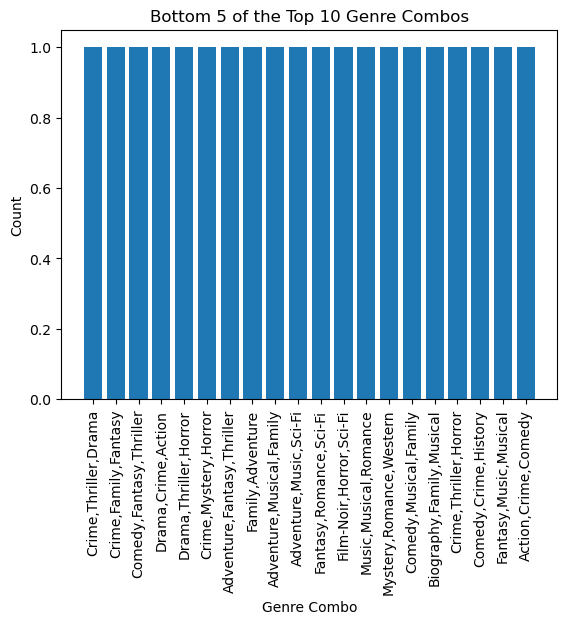

In [51]:
bottom_5_genres = df['new_genre'].value_counts().nsmallest(20, keep='last')
plt.bar(bottom_5_genres.index, bottom_5_genres.values)
plt.xticks(rotation=90)
plt.xlabel('Genre Combo')
plt.ylabel('Count')
plt.title('Bottom 5 of the Top 10 Genre Combos')
plt.savefig('Images/bottom_genre_counts.png', bbox_inches='tight')
plt.show()

#### Due to this I will be removing movie genre combo with only 1 count

#### removing genre less than 3

In [52]:
# Filter the genres that have less than 3 occurrences
valid_genres = genre_counts[genre_counts >= 10].index

In [53]:
df = df[df['new_genre'].isin(valid_genres)]

In [54]:
genre_counts = df['new_genre'].value_counts()
print(genre_counts)

Drama                      9707
Comedy                     4495
Comedy,Drama               3198
Drama,Romance              3195
Comedy,Drama,Romance       2485
                           ... 
Horror,Music                 10
Horror,Thriller,Western      10
Adventure,Comedy,Music       10
Action,Drama,Music           10
Adventure,Crime,Horror       10
Name: new_genre, Length: 392, dtype: int64


### Corr for genre

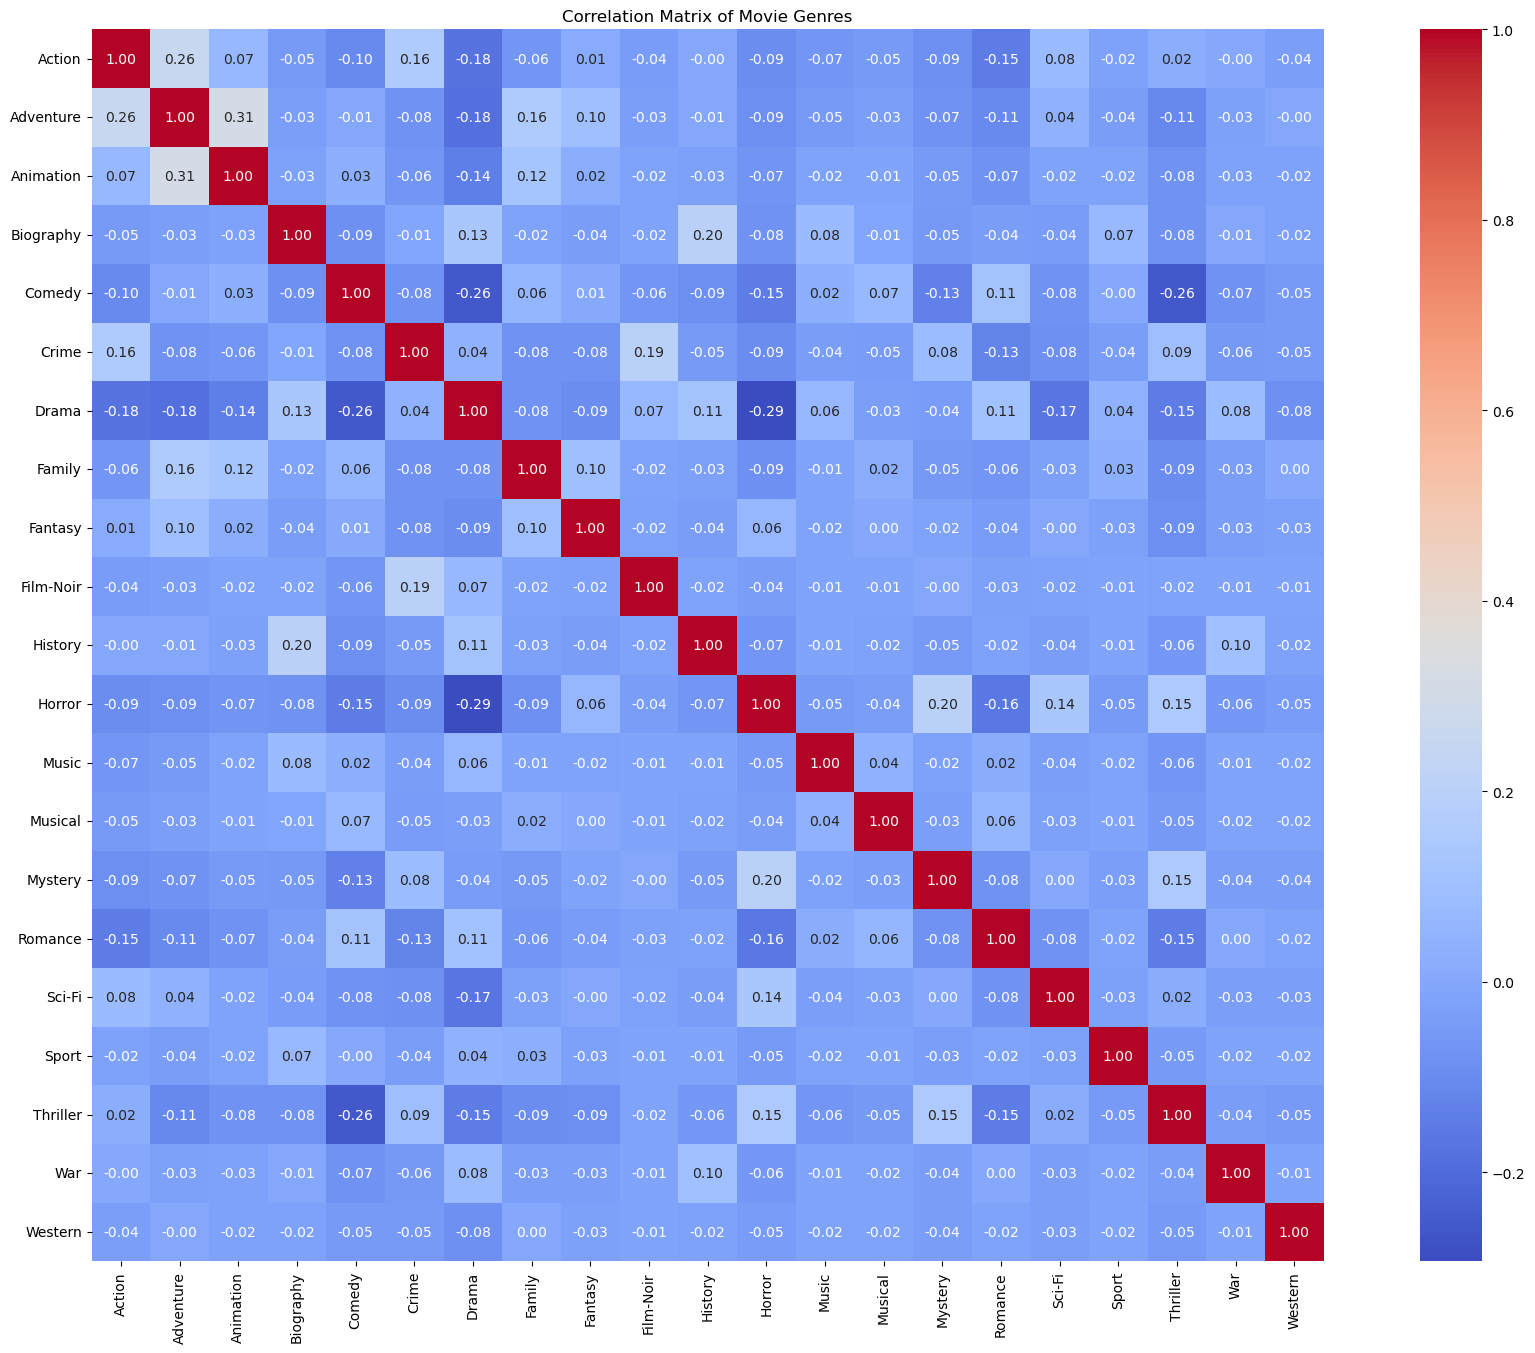

In [55]:
genres = sorted(set([g for genre_list in df['new_genre'] for g in genre_list.split(',')]))
genre_matrix = pd.DataFrame(columns=genres, index=df.index, data=0)
for i, row in df.iterrows():
    for g in row['new_genre'].split(','):
        genre_matrix.loc[i, g] = 1

# Compute correlation matrix of genre features
correlation_matrix = genre_matrix.corr()

# Plot correlation matrix using Seaborn
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, fmt='.2f')
plt.title('Correlation Matrix of Movie Genres')
plt.savefig('Images/Corr_movie_genres.png', bbox_inches='tight')
plt.show()

In [57]:
genres = sorted(set([g for genre_list in df['new_genre'] for g in genre_list.split(',')]))
genre_matrix = pd.DataFrame(columns=genres, index=df.index, data=0)
for i, row in df.iterrows():
    for g in row['new_genre'].split(','):
        genre_matrix.loc[i, g] = 1

# Compute correlation matrix of genre features
correlation_matrix = genre_matrix.corr()

In [58]:
correlation_matrix

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Action,1.000000,0.256293,0.068338,-0.046837,-0.102512,0.157261,-0.177477,-0.062821,0.010894,-0.044174,...,-0.093004,-0.065890,-0.047034,-0.088206,-0.152193,0.077078,-0.023038,0.024271,-0.000076,-0.035775
Adventure,0.256293,1.000000,0.310466,-0.031898,-0.005151,-0.076360,-0.182622,0.156872,0.099815,-0.032691,...,-0.090285,-0.047584,-0.034528,-0.071934,-0.105185,0.039629,-0.039659,-0.111518,-0.026159,-0.004249
Animation,0.068338,0.310466,1.000000,-0.025796,0.031951,-0.063606,-0.141584,0.122098,0.024388,-0.016723,...,-0.070490,-0.019014,-0.013232,-0.047703,-0.071729,-0.018985,-0.020288,-0.076647,-0.025426,-0.022857
Biography,-0.046837,-0.031898,-0.025796,1.000000,-0.086143,-0.007129,0.132831,-0.019643,-0.038606,-0.018222,...,-0.076807,0.075323,-0.007667,-0.051978,-0.039793,-0.044280,0.073097,-0.078748,-0.005132,-0.024905
Comedy,-0.102512,-0.005151,0.031951,-0.086143,1.000000,-0.080998,-0.255678,0.056061,0.007722,-0.064788,...,-0.147653,0.024703,0.071209,-0.133113,0.112705,-0.077225,-0.000341,-0.255688,-0.072061,-0.048561
Crime,0.157261,-0.076360,-0.063606,-0.007129,-0.080998,1.000000,0.037398,-0.077178,-0.076238,0.193423,...,-0.092793,-0.041013,-0.045924,0.084397,-0.126051,-0.082942,-0.039259,0.091291,-0.056119,-0.050213
Drama,-0.177477,-0.182622,-0.141584,0.132831,-0.255678,0.037398,1.000000,-0.076850,-0.093297,0.069046,...,-0.293752,0.060302,-0.034633,-0.043499,0.109939,-0.171929,0.037800,-0.148585,0.083217,-0.083660
Family,-0.062821,0.156872,0.122098,-0.019643,0.056061,-0.077178,-0.076850,1.000000,0.097665,-0.020370,...,-0.085863,-0.011829,0.020471,-0.053881,-0.062603,-0.026897,0.028143,-0.093362,-0.030972,0.003059
Fantasy,0.010894,0.099815,0.024388,-0.038606,0.007722,-0.076238,-0.093297,0.097665,1.000000,-0.022026,...,0.061187,-0.020201,0.003474,-0.020458,-0.042569,-0.004753,-0.026721,-0.087010,-0.033489,-0.030105
Film-Noir,-0.044174,-0.032691,-0.016723,-0.018222,-0.064788,0.193423,0.069046,-0.020370,-0.022026,1.000000,...,-0.039479,-0.014464,-0.011983,-0.002157,-0.029895,-0.022760,-0.011362,-0.020504,-0.014240,-0.012801


In [59]:
df.isnull().sum()

title           0
genre           0
synopsis        0
new_genre       0
corpus          0
genre_length    0
dtype: int64

In [60]:
# df.to_csv('nobinarizer.csv',index=False)

### Multilabelbinarizer (MLB)

In [61]:
genres = sorted(set([g for genre_list in df['new_genre'] for g in genre_list.split(',')]))
genre_matrices = []
for g in genres:
    genre_matrix = pd.DataFrame(columns=['_'+g], index=df.index, data=0)
    for i, row in df.iterrows():
        if g in row['new_genre']:
            genre_matrix.loc[i, '_'+g] = 1
    genre_matrices.append(genre_matrix)

# Concatenate binary feature matrices horizontally
genre_matrix = pd.concat(genre_matrices, axis=1)

# Append binary feature matrix to original DataFrame
df = pd.concat([df, genre_matrix], axis=1)

In [62]:
df.columns = [c.lower() for c in df.columns]
df.head()

,title,genre,synopsis,new_genre,corpus,genre_length,_action,_adventure,_animation,_biography,...,_horror,_music,_musical,_mystery,_romance,_sci-fi,_sport,_thriller,_war,_western
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [64]:
genre_matrix

,_Action,_Adventure,_Animation,_Biography,_Comedy,_Crime,_Drama,_Family,_Fantasy,_Film-Noir,...,_Horror,_Music,_Musical,_Mystery,_Romance,_Sci-Fi,_Sport,_Thriller,_War,_Western
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79989,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79990,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79991,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79992,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
import joblib

In [51]:
le = genre_matrix

In [52]:
joblib.dump(le, "le.joblib")

['le.joblib']

In [51]:
df.isnull().sum()

title           0
genre           0
synopsis        0
new_genre       0
corpus          0
genre_length    0
_action         0
_adventure      0
_animation      0
_biography      0
_comedy         0
_crime          0
_drama          0
_family         0
_fantasy        0
_film-noir      0
_history        0
_horror         0
_music          0
_musical        0
_mystery        0
_romance        0
_sci-fi         0
_sport          0
_thriller       0
_war            0
_western        0
dtype: int64

## Synopsis

In [65]:
df['corpus_length'] = df['corpus'].apply(lambda x: len(x.split()))

In [66]:
df.head()

,title,genre,synopsis,new_genre,corpus,genre_length,_action,_adventure,_animation,_biography,...,_music,_musical,_mystery,_romance,_sci-fi,_sport,_thriller,_war,_western,corpus_length
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,24
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,14
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,...,0,0,0,0,1,0,1,0,0,10


In [67]:
df.isnull().sum()

title            0
genre            0
synopsis         0
new_genre        0
corpus           0
genre_length     0
_action          0
_adventure       0
_animation       0
_biography       0
_comedy          0
_crime           0
_drama           0
_family          0
_fantasy         0
_film-noir       0
_history         0
_horror          0
_music           0
_musical         0
_mystery         0
_romance         0
_sci-fi          0
_sport           0
_thriller        0
_war             0
_western         0
corpus_length    0
dtype: int64

<Axes: >

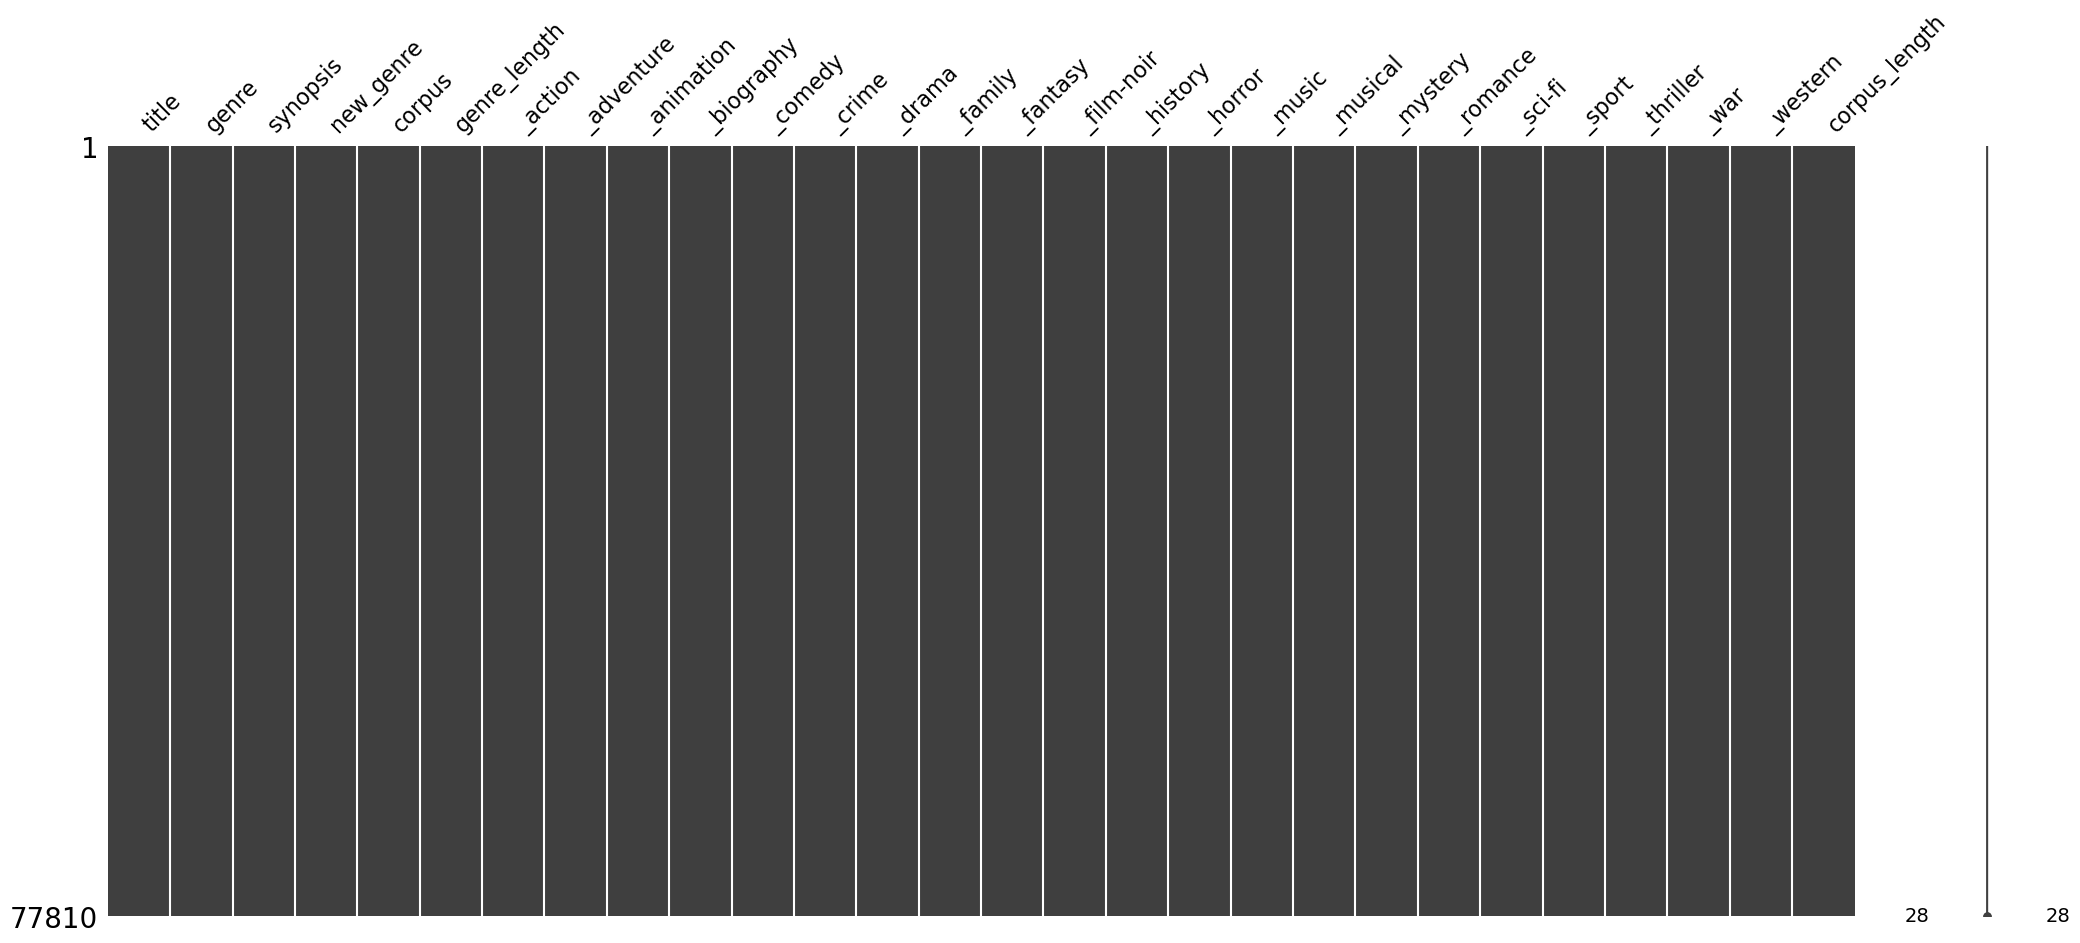

In [68]:
msno.matrix(df)

### Checking the length of synopsis

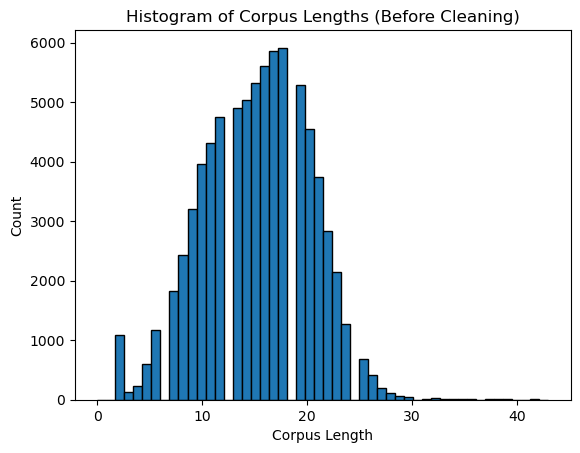

In [69]:
import matplotlib.pyplot as plt


plt.hist(df['corpus_length'], bins=50, edgecolor='black')
plt.xlabel('Corpus Length')
plt.ylabel('Count')
plt.title('Histogram of Corpus Lengths (Before Cleaning)')
plt.savefig('Images/Corpus_length_before_cleaning.png', bbox_inches='tight')
plt.show()

### checking meaningful words in synopsis with length less than 4

In [70]:
# Filter the DataFrame to show only the synopses with a length of 3 words
df_4words = df[df['corpus_length'] == 3]

# Print the synopses and their lengths
for synopsis in df_4words['corpus']:
    print(synopsis, len(synopsis.split()))

plot unknown time 3
crosscultur romant comedi 3
plot unknown time 3
plot unknown time 3
plot kept wrap 3
board school adventur 3
plot unknown time 3
plot kept wrap 3
plot kept wrap 3
plot kept wrap 3
plot detail wrap 3
plot unknown time 3
plot kept wrap 3
plot kept wrap 3
plot kept wrap 3
stori woman lover 3
satir world superrich 3
sequel 2018 reboot 3
sequel armi dead 3
plot kept wrap 3
plot unknown time 3
plot kept wrap 3
plot kept wrap 3
third instal franchis 3
plot detail wrap 3
plot kept wrap 3
explor languag dream 3
plot kept wrap 3
plot unknown time 3
plot kept wrap 3
plot kept wrap 3
game show seem 3
plot kept wrap 3
plot kept wrap 3
build tear apart 3
plot kept wrap 3
plot kept wrap 3
life michelangelo buonarroti 3
sequel attack block 3
soldier last stand 3
young punk odyssey 3
plot kept wrap 3
plot kept wrap 3
part creep trilog 3
plot undisclos time 3
bellboy big tip 3
plot unknown time 3
reminisc youth 1950 3
stori jesu christ 3
follow brother shenanigan 3
plot kept wrap 3
i

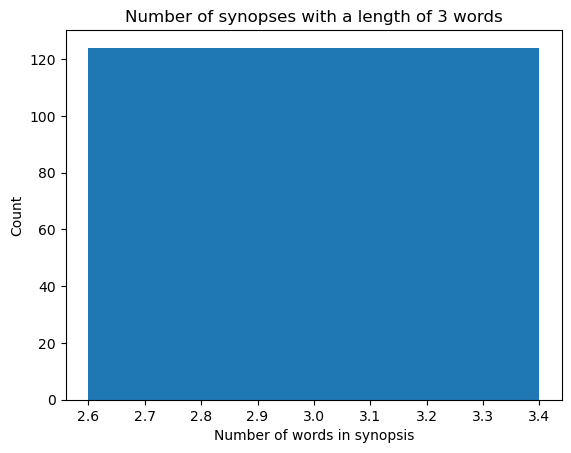

In [72]:
import matplotlib.pyplot as plt

# Count the number of synopses with a length of 3 words
counts = df_4words['corpus_length'].value_counts()

# Create a bar chart
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Number of words in synopsis')
plt.ylabel('Count')
plt.title('Number of synopses with a length of 3 words')
plt.savefig('Images/synopses with lengthof 3 words.png', bbox_inches='tight')
# Show the plot
plt.show()

### dropping all the synopsis without any meaning

In [73]:
threshold = 3
df.drop(df[df['corpus_length'] <= threshold].index, inplace=True)

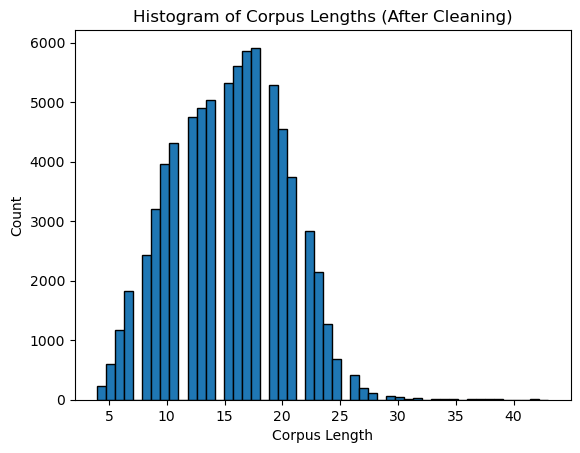

In [74]:
plt.hist(df['corpus_length'], bins=50, edgecolor='black')
plt.xlabel('Corpus Length')
plt.ylabel('Count')
plt.title('Histogram of Corpus Lengths (After Cleaning)')
plt.savefig('Images/Length_of_corpus_after_cleaning.png', bbox_inches='tight')
plt.show()

# 3 - Feature Engineering

In [75]:
df.head()

,title,genre,synopsis,new_genre,corpus,genre_length,_action,_adventure,_animation,_biography,...,_music,_musical,_mystery,_romance,_sci-fi,_sport,_thriller,_war,_western,corpus_length
0,Avatar: The Way of Water,"\nAction, Adventure, Fantasy",Jake Sully lives newfound family formed extras...,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,24
1,The Menu,"\nHorror, Thriller",A young couple travels remote island eat exclu...,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,14
2,Babylon,"\nComedy, Drama, History","A tale outsized ambition outrageous excess, tr...","Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Everything Everywhere All at Once,"\nAction, Adventure, Comedy",A middle-aged Chinese immigrant swept insane a...,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,M3gan,"\nHorror, Sci-Fi, Thriller",A robotics engineer toy company builds life-li...,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,...,0,0,0,0,1,0,1,0,0,10


### Dropping unnecessary columns

In [76]:
df = df.drop(['genre', 'synopsis', 'corpus_length'], axis=1)

In [77]:
df.head()

,title,new_genre,corpus,genre_length,_action,_adventure,_animation,_biography,_comedy,_crime,...,_horror,_music,_musical,_mystery,_romance,_sci-fi,_sport,_thriller,_war,_western
0,Avatar: The Way of Water,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Menu,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Babylon,"Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Everything Everywhere All at Once,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M3gan,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Word Cloud Plots

In [64]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from wordcloud import WordCloud

In [66]:
df.columns

Index(['title', 'new_genre', 'corpus', 'genre_length', '_action', '_adventure',
       '_animation', '_biography', '_comedy', '_crime', '_drama', '_family',
       '_fantasy', '_film-noir', '_history', '_horror', '_music', '_musical',
       '_mystery', '_romance', '_sci-fi', '_sport', '_thriller', '_war',
       '_western'],
      dtype='object')

In [80]:
import os

if not os.path.exists('Images/results'):
    os.makedirs('Images/results')

In [81]:
import os

if not os.path.exists('Images/results/wordcloud_Action.png'):
    plt.savefig('Images/results/wordcloud_Action.png')

<Figure size 640x480 with 0 Axes>

In [82]:
genre_category = df[['_action', '_adventure',
       '_animation', '_biography', '_comedy', '_crime', '_drama', '_family',
       '_fantasy', '_film-noir', '_history', '_horror', '_music', '_musical',
       '_mystery', '_romance', '_sci-fi', '_sport', '_thriller', '_war',
       '_western']]

In [83]:
genre_matrix

,_Action,_Adventure,_Animation,_Biography,_Comedy,_Crime,_Drama,_Family,_Fantasy,_Film-Noir,...,_Horror,_Music,_Musical,_Mystery,_Romance,_Sci-Fi,_Sport,_Thriller,_War,_Western
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79989,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79990,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79991,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79992,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_category = df.columns[df.columns.str.startswith('_')]

def save_wordcloud_plots(data, labels):
    for idx, col in enumerate(labels):
        corpus = ' '.join(data[data[col]==1]['corpus'])
        if corpus:
            wordcloud = WordCloud(max_font_size=50).generate(corpus)
            fig, ax = plt.subplots(figsize=(9, 9))
            ax.imshow(wordcloud)
            ax.axis("off")
            ax.set(title='Movie Genre: {0}'.format(col[1:]))
            plt.savefig('./Images/results/wordcloud_{0}.png'.format(col[1:]), bbox_inches='tight')
            plt.close()
        else:
            print(f"No corpus for {col[1:]}")

if not os.path.exists('Images/results'):
    os.makedirs('Images/results')

if not os.path.exists('Images/results/wordcloud_Action.png'):
    save_wordcloud_plots(df, genre_category)

In [85]:
save_wordcloud_plots(df, genre_category)

## Multi Genre Distribution corpus

In [241]:
def save_genre_pdf_given_genre_plots(data, labels):
    for idx, col in enumerate(labels):
        df_sum_given_genre = pd.DataFrame({'Genre':labels, 'Total': df[df[col]==1]['corpus'].apply(lambda x: len(x.split()))})
        df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
        df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
        ax = plt.figure(figsize=(9, 9)).add_subplot(1, 1, 1)
        sns.barplot(data=df_sum_given_genre, x='Genre', y='Total', axes=ax)
        ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
        plt.xticks(rotation=90)
        plt.savefig('./Images/results/genre_pdf_given_{0}.png'.format(col), bbox_inches='tight')
        plt.close()
        
def save_genre_pdf_given_genre_subplots(data, labels):
    num_plot = 3
    fig_per_plot = math.ceil(len(genre_category)/num_plot)
    num_cols = 3
    num_rows = math.ceil(fig_per_plot/num_cols)
    for idx, col in enumerate(genre_category):
        if idx%fig_per_plot==0:
            fig = plt.figure(figsize=(20, 30))
        df_sum_given_genre = pd.DataFrame({'Genre':labels, 'Total': df[df[col]==1]['corpus'].apply(lambda x: len(x.split()))})
        df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
        df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
        ax = fig.add_subplot(num_rows, num_cols, idx%fig_per_plot+1)
        sns.barplot(data=df_sum_given_genre, x='Genre', y='Total', axes=ax)
        ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
        plt.xticks(rotation=90)
        if (idx+1)%fig_per_plot==0 or idx==len(category_columns)-1:
            plt.savefig('./Images/results/genre_pdf_part{0}.png'.format(1+idx//fig_per_plot), bbox_inches='tight')
            plt.close()
            fig = plt.figure(figsize=(20, 30))

In [243]:
# fig = plt.figure(figsize=(18, 60))
# num_cols = 3
# num_rows = math.ceil(len(genre_category)/num_cols)
# for idx, col in enumerate(genre_category):
#     df_sum_given_genre = pd.DataFrame({'Genre':genre_category, 'Total': df[df[col]==1][genre_category].sum()})
#     df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
#     df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
#     fig = plt.figure(figsize=(8, 6))
#     ax = sns.barplot(data=df_sum_given_genre, x='Genre', y='Total')
#     ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig('./Images/results/genre_distribution_{0}.png'.format(col), bbox_inches='tight')
#     # plt.close()
# plt.tight_layout()
# plt.show()

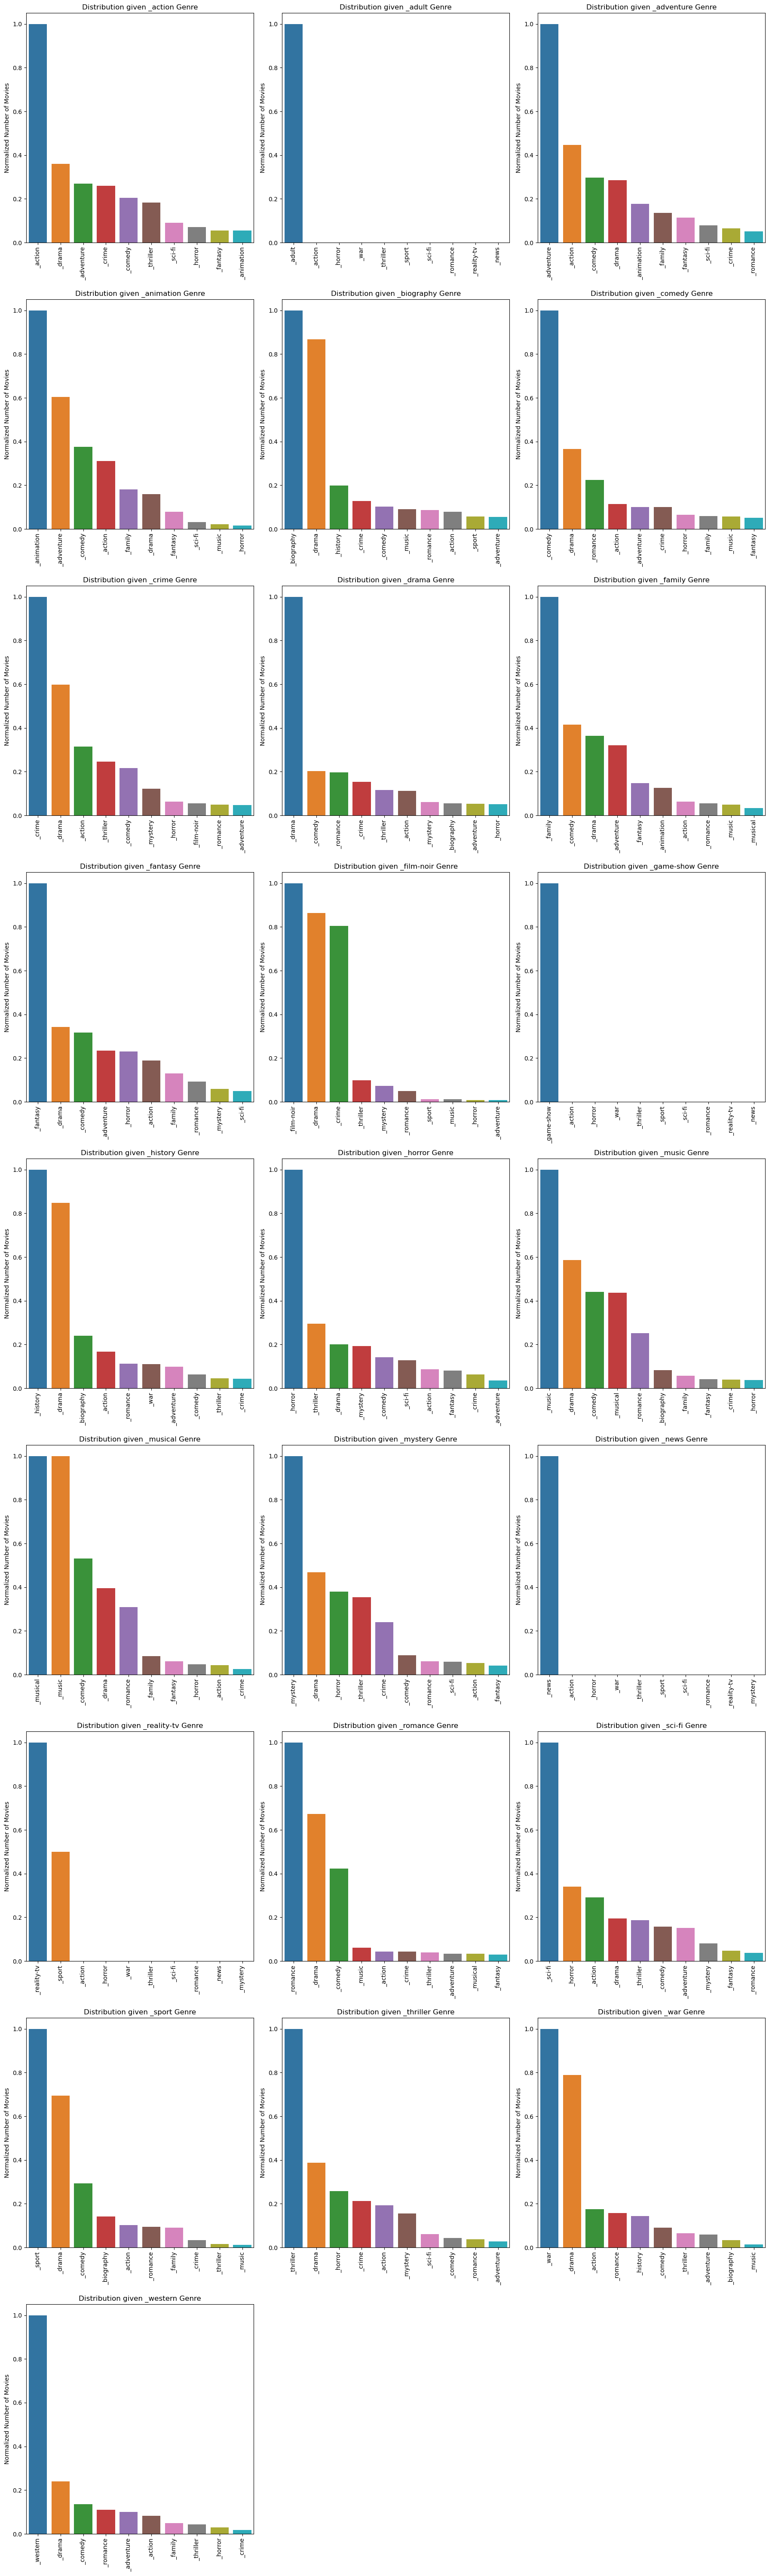

In [244]:
fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(genre_category)/num_cols)
for idx, col in enumerate(genre_category):
    df_sum_given_genre = pd.DataFrame({'Genre':genre_category, 'Total': df[df[col]==1][genre_category].sum()})
    df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
    df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    sns.barplot(data=df_sum_given_genre, x='Genre', y='Total', axes=ax)
    ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
    plt.xticks(rotation=90)
    plt.tight_layout()
    # plt.savefig('./Images/results/genre_distribution.{0}.png', bbox_inches='tight')

plt.tight_layout()
plt.show()

# Modelling

In [89]:
df.to_csv('finalmovie.csv',index=False)

In [78]:
df = pd.read_csv('finalmovie.csv')
df.head()

,title,new_genre,corpus,genre_length,action,adventure,animation,biography,comedy,crime,...,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,Avatar: The Way of Water,"Action,Adventure,Fantasy",jake sulli life newfound famili form extrasola...,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Menu,"Horror,Thriller",young coupl travel remot island eat exclus res...,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Babylon,"Comedy,Drama,History",tale outsiz ambit outrag excess trace rise fal...,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Everything Everywhere All at Once,"Action,Adventure,Comedy",middleag chines immigr swept insan adventur al...,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M3gan,"Horror,Sci-Fi,Thriller",robot engin toy compani build lifelik doll beg...,3,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Feature selection

### TFIDF Feature X (corpus)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['corpus'])
print(X.shape)

(76607, 34659)


In [81]:
df.columns

Index(['title', 'new_genre', 'corpus', 'genre_length', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical',
       'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western'],
      dtype='object')

### Target y (binary)

In [82]:
y = df[['title', 'new_genre', 'corpus', 'genre_length', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical',
       'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']]

## Checking for imbalance data

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['new_genre'], test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (61285,)
Testing set shape: (15322,)


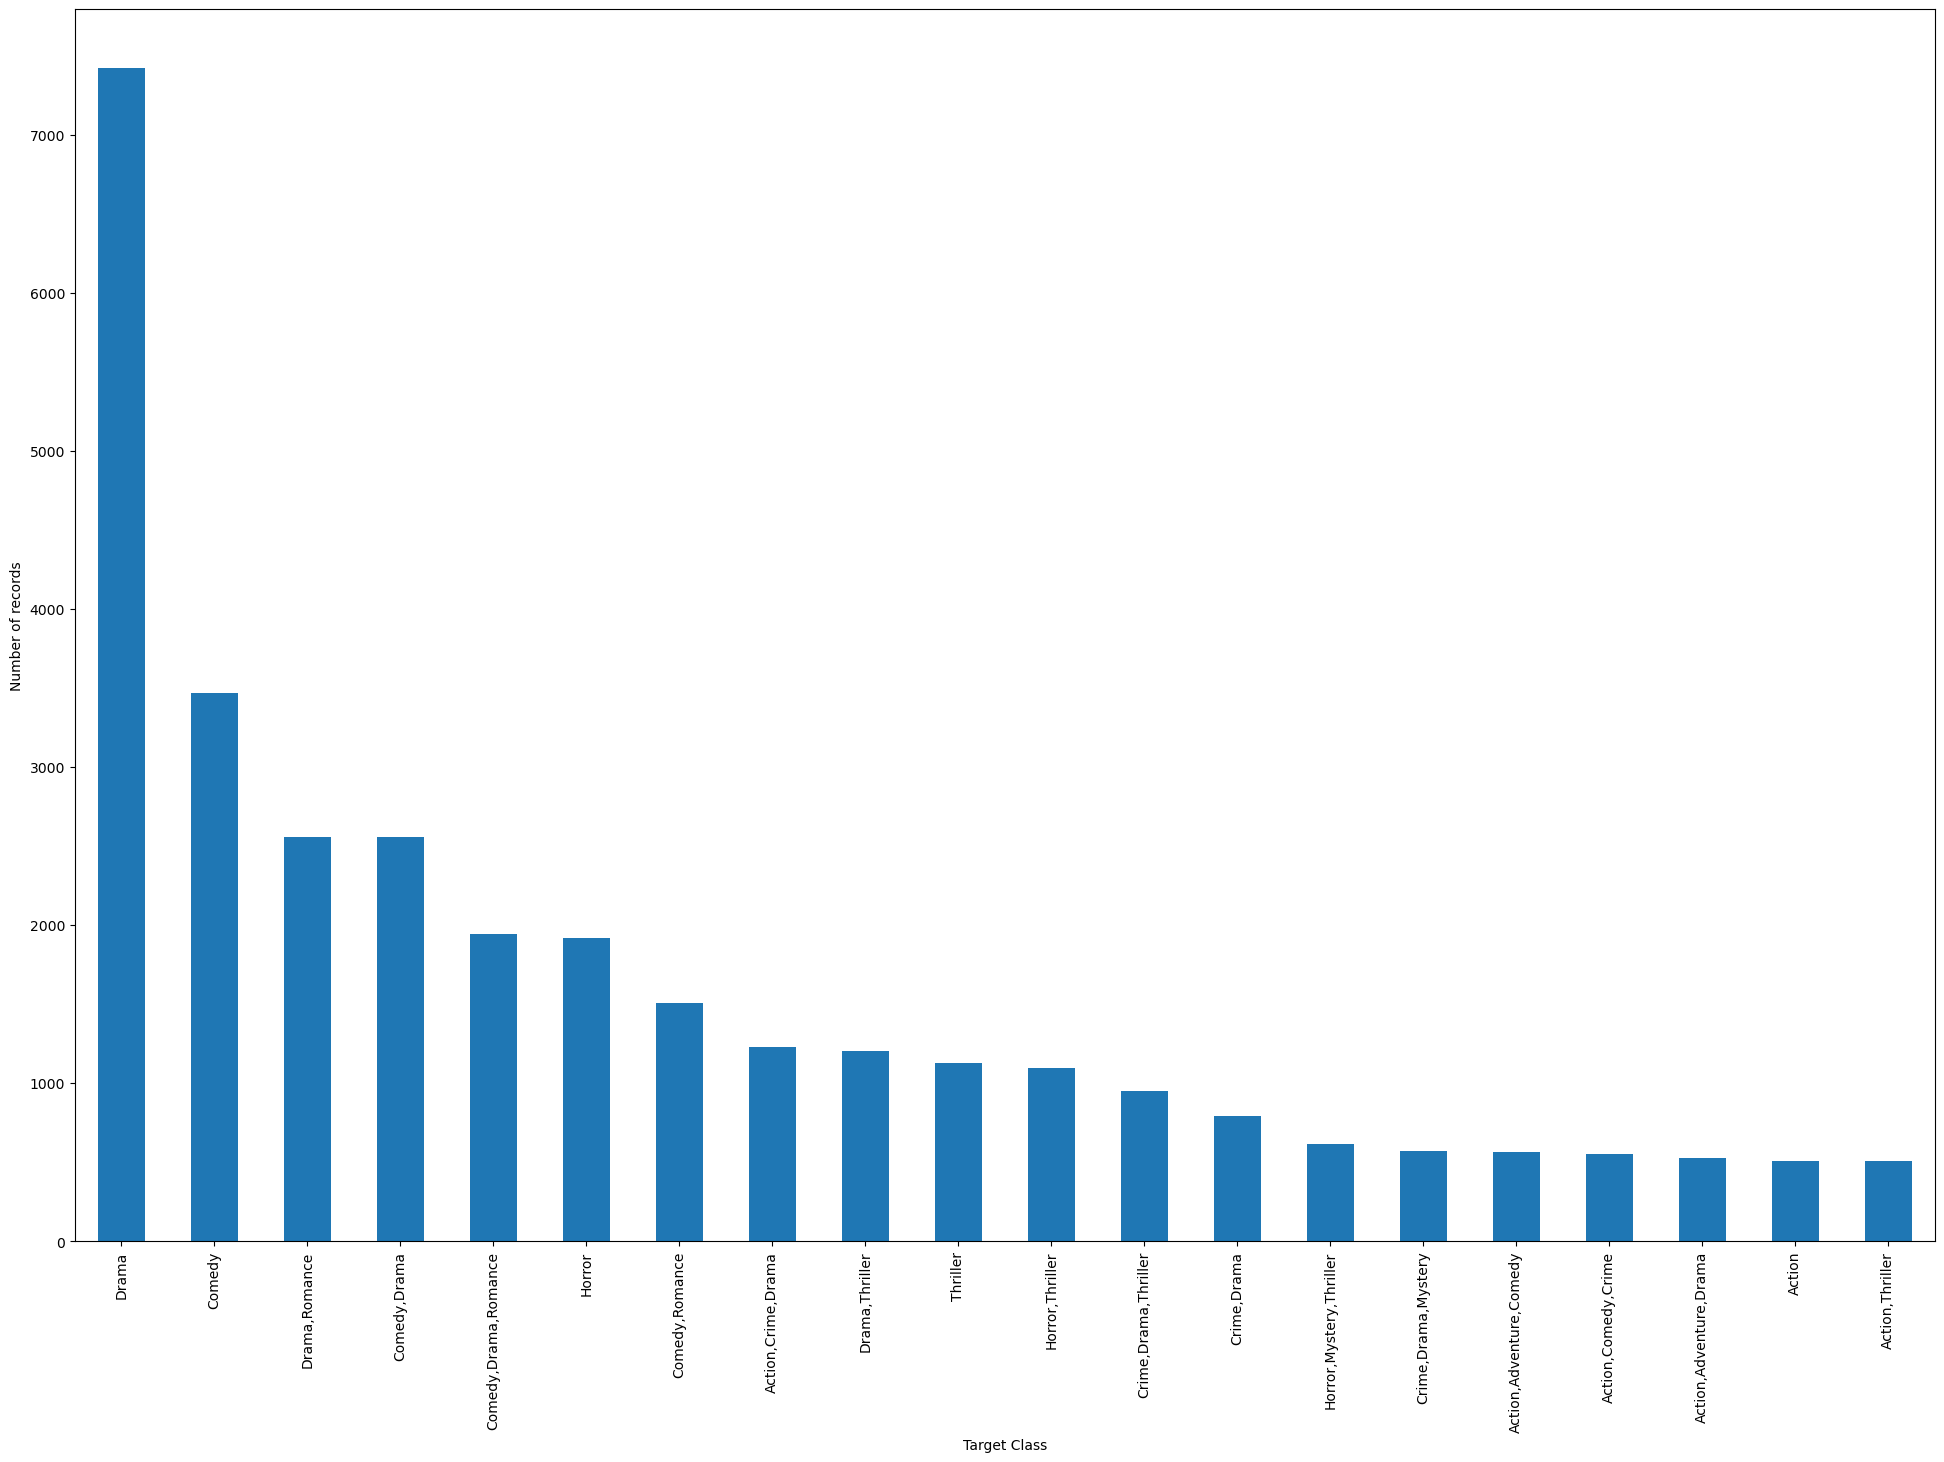

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24, 16))

count = y_train.value_counts().head(20)  # Get top 20 values
count.plot.bar(ax=ax)
ax.set_ylabel('Number of records')
ax.set_xlabel('Target Class')
plt.savefig('Images/Imbalance_data.png', bbox_inches='tight')
plt.show()

In [85]:
df.shape

(76607, 25)

## Training model

### DecisionTreeClassifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt

X = df['corpus']
y = df['new_genre']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), max_df=0.8, min_df=5)

# # Fit and transform the training data
# X_train_tfidf = tfidf.fit_transform(X_train)

# # Transform the test data
# X_test_tfidf = tfidf.transform(X_test)


# model = DecisionTreeClassifier()
# model.fit(X_train_tfidf, y_train)

# # Make predictions on test set
# y_pred = model.predict(X_test_tfidf)


# print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
# # Print classification report and confusion matrix
# print(classification_report(y_test, y_pred, zero_division=1))
# print(confusion_matrix(y_test, y_pred))

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss, precision_score, recall_score, f1_score

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), max_df=0.8, min_df=5)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)


model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_tfidf)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Hamming Loss: {:.3f}".format(hamming_loss(y_test, y_pred)))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print("F1-Score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted', zero_division=1)))

# # Print classification report and confusion matrix
# print(classification_report(y_test, y_pred, zero_division=1))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.738
Hamming Loss: 0.262
Precision: 0.743
Recall: 0.738
F1-Score: 0.735


### Analysis

The accuracy score in the classification report is a measure of the percentage of correct predictions overall. In this case, the model has an accuracy of 0.74 or 74%, which means that it correctly predicted the class of 74% of the samples in the test set.

The macro avg score is the unweighted average of precision, recall, and F1 score across all classes. The weighted avg score is the weighted average of precision, recall, and F1 score, where the weights are the number of samples in each class.

In this case, the macro avg and weighted avg scores are similar to the accuracy score, indicating that the model is performing similarly across all classes. The macro avg score is slightly higher than the weighted avg score, which means that the performance of the model is more balanced across all classes.

## Training data before sampling

### Classification models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['new_genre'], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)
dt_y_pred = dt_model.predict(X_test_tfidf)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_y_pred = rf_model.predict(X_test_tfidf)

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_tfidf, y_train)
lr_y_pred = lr_model.predict(X_test_tfidf)

# Support Vector Machine Classifier
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_y_pred = svm_model.predict(X_test_tfidf)

# Print classification report and confusion matrix for each model
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_y_pred, zero_division=1))
print(confusion_matrix(y_test, dt_y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, dt_y_pred)))
print()

print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred, zero_division=1))
print(confusion_matrix(y_test, rf_y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, rf_y_pred)))
print()

print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_y_pred, zero_division=1))
print(confusion_matrix(y_test, lr_y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, lr_y_pred)))
print()

print("Support Vector Machine Classifier:")
print(classification_report(y_test, svm_y_pred, zero_division=1))
print(confusion_matrix(y_test, svm_y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, svm_y_pred)))
print()

# sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)


Decision Tree Classifier:
                              precision    recall  f1-score   support

                      Action       0.74      0.84      0.79       121
            Action,Adventure       0.85      0.52      0.65        21
  Action,Adventure,Biography       0.56      0.56      0.56         9
     Action,Adventure,Comedy       0.66      0.60      0.63       147
      Action,Adventure,Crime       0.65      0.70      0.67        50
      Action,Adventure,Drama       0.65      0.57      0.61       147
     Action,Adventure,Family       0.80      0.67      0.73        24
    Action,Adventure,Fantasy       0.64      0.48      0.55        75
    Action,Adventure,History       0.93      0.82      0.87        17
     Action,Adventure,Horror       0.77      0.74      0.76        23
    Action,Adventure,Mystery       1.00      0.62      0.77         8
    Action,Adventure,Romance       0.87      0.65      0.74        20
     Action,Adventure,Sci-Fi       0.39      0.45      0.42    

## Analysis

Based on the training it can be concluded that 

 - SVMC ----> (75.2%) (Better)
 - RandomForestClassifier ---> (75.3%) (Better)
 - DecisionTreeClassifier ---> (73.5%)
 - LinearRegressionClassifier ---> (33.0%) (worst performing)

## Training model after sampling

#### Data sampling using ROS  

In [57]:
import imblearn
print(imblearn.__version__)

0.10.1


In [58]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [59]:
X = df['corpus']
y = df['new_genre']

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

X_tfidf = tfidf.fit_transform(X)
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [60]:
print(X_resampled.shape)
print(y_resampled.shape)

(87696, 41018)
(87696,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Single Vector Machine": SVC(kernel='linear')
    
}

for model_name, model in models.items():
    # Fit the model on the resampled data
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Print classification report and confusion matrix
    print(f"Model: {model_name}","---> Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    # print(classification_report(y_test, y_pred, zero_division=1))
    # print(confusion_matrix(y_test, y_pred))
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

Model: Decision Tree
                              precision    recall  f1-score   support

                      Action       0.77      0.89      0.83       111
            Action,Adventure       0.85      0.63      0.72        27
  Action,Adventure,Biography       0.88      0.78      0.82         9
     Action,Adventure,Comedy       0.67      0.63      0.65       150
      Action,Adventure,Crime       0.72      0.65      0.68        51
      Action,Adventure,Drama       0.65      0.67      0.66       150
     Action,Adventure,Family       0.88      0.65      0.75        23
    Action,Adventure,Fantasy       0.55      0.52      0.54        63
    Action,Adventure,History       0.85      0.85      0.85        13
     Action,Adventure,Horror       0.79      0.74      0.77        31
    Action,Adventure,Mystery       0.62      0.62      0.62         8
    Action,Adventure,Romance       0.78      0.78      0.78        18
     Action,Adventure,Sci-Fi       0.61      0.47      0.53        7

## Before and after ROS sampling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



y_top20 = df['new_genre'].value_counts().iloc[:20].index.tolist()
df = df[df['new_genre'].isin(y_top20)]


le = LabelEncoder()
df['new_genre'] = le.fit_transform(df['new_genre'])


X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['new_genre'], test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)


before_resample = pd.Series(y_train).value_counts().sort_index()


ros = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
y_train_resampled = pd.Series(y_train_resampled)


after_resample = y_train_resampled.value_counts().sort_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar(before_resample.index, before_resample.values)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of samples')
ax1.set_title('Class distribution before ROS resampling')


ax2.bar(after_resample.index, after_resample.values)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Number of samples')
ax2.set_title('Class distribution after ROS resampling')

plt.show()

## Training with SMOTE

In [ ]:
X = df['corpus']
y = df['new_genre']

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

X_tfidf = tfidf.fit_transform(X)
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Single Vector Machine": SVC(kernel='linear')
    
}

for model_name, model in models.items():
    # Fit the model on the resampled data
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Print classification report and confusion matrix
    print(f"Model: {model_name}","---> Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    # print(classification_report(y_test, y_pred, zero_division=1))
    # print(confusion_matrix(y_test, y_pred))
    # print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

## Analysis

Random Forest ---> Accuracy(84.2%)
Decision Tree ---> Accuracy(82.7%)

### Before and After SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



y_top20 = df['new_genre'].value_counts().iloc[:20].index.tolist()
df = df[df['new_genre'].isin(y_top20)]


le = LabelEncoder()
df['new_genre'] = le.fit_transform(df['new_genre'])


X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['new_genre'], test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)


before_resample = pd.Series(y_train).value_counts().sort_index()


smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
y_train_resampled = pd.Series(y_train_resampled)


after_resample = y_train_resampled.value_counts().sort_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar(before_resample.index, before_resample.values)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of samples')
ax1.set_title('Class distribution before SMOTE resampling')


ax2.bar(after_resample.index, after_resample.values)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Number of samples')
ax2.set_title('Class distribution after SMOTE resampling')

plt.show()


# Prediction using the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the random forest classifier on the training set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy on testing set:", accuracy)
print("Classification report:\n", report)
print("Confusion matrix:\n", conf_matrix)

the model correctly classified all movies with the genre "Action,Crime,Thriller" and "Horror" as they have F1-scores of 0.99 and 0.84, respectively. However, the model had difficulty distinguishing between certain genres like "Drama" and "Comedy, Drama, Romance". For instance, the model predicted 37 out of 487 movies with the genre "Comedy, Drama, Romance" as "Drama", and 121 out of 649 movies with the genre "Drama" as "Comedy, Drama, Romance".

# Predicting genre using synopsis

In [ ]:
# # Import necessary libraries
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier

# # Define the preprocessing steps
# tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

# # Fit the vectorizer on the entire corpus
# X_tfidf = tfidf.fit_transform(df['corpus'])

# # Train the model on the entire dataset
# clf = RandomForestClassifier()
# clf.fit(X_tfidf, df['new_genre'])

# # Example synopsis to predict the genre
# new_synopsis = "A group of friends go on a road trip and discover a hidden treasure."

# # Preprocess the new synopsis
# new_synopsis_tfidf = tfidf.transform([new_synopsis])

# # Predict the genre of the new synopsis
# predicted_genre = clf.predict(new_synopsis_tfidf)

# print("Predicted genre:", predicted_genre)



In [ ]:
# # Import necessary libraries
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier

# # Define the preprocessing steps
# tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

# # Fit the vectorizer on the entire corpus
# X_tfidf = tfidf.fit_transform(df['corpus'])

# # Train the model on the entire dataset
# clf = RandomForestClassifier()
# clf.fit(X_tfidf, df['new_genre'])

# # Example synopsis to predict the genre
# new_synopsis = "A group of friends go on a road trip and discover a hidden treasure."

# # Preprocess the new synopsis
# new_synopsis_tfidf = tfidf.transform([new_synopsis])

# # Predict the genre of the new synopsis
# predicted_genre = clf.predict(new_synopsis_tfidf)

# # Map the predicted label to its corresponding genre
# genre_labels = clf.classes_
# predicted_genre = genre_labels[predicted_genre[0]]

# print("Predicted genre:", predicted_genre)


In [ ]:
df.head()

In [ ]:
# # Import necessary libraries
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier

# # Define the preprocessing steps
# tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

# # Fit the vectorizer on the entire corpus
# X_tfidf = tfidf.fit_transform(df['corpus'])

# # Train the model on the entire dataset
# clf = RandomForestClassifier()
# clf.fit(X_tfidf, df['new_genre'])

# # Example synopsis to predict the genre
# new_synopsis = "A group of friends go on a road trip and discover a hidden treasure."

# # Preprocess the new synopsis
# new_synopsis_tfidf = tfidf.transform([new_synopsis])

# # Predict the genre of the new synopsis
# predicted_genre = clf.predict(new_synopsis_tfidf)

# # Map the predicted label to its corresponding genre name
# genre_dict = {
#     0: 'Action, Adventure, Comedy',
#     1: 'Action, Adventure, Drama',
#     2: 'Action, Comedy, Crime',
#     3: 'Action, Crime, Drama',
#     4: 'Action, Crime, Thriller',
#     5: 'Action, Thriller',
#     6: 'Comedy',
#     7: 'Comedy, Drama',
#     8: 'Comedy, Drama, Romance',
#     9: 'Comedy, Romance',
#     10: 'Crime, Drama',
#     11: 'Crime, Drama, Mystery',
#     12: 'Crime, Drama, Thriller',
#     13: 'Drama',
#     14: 'Drama, Romance',
#     15: 'Drama, Thriller',
#     16: 'Horror',
#     17: 'Horror, Mystery, Thriller',
#     18: 'Horror, Thriller',
#     19: 'Thriller'
# }

# predicted_genre_name = genre_dict[predicted_genre[0]]

# print("Predicted genre:", predicted_genre_name)


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def genre_prediction(sample_synopsis):
    # Preprocess the input synopsis
    sample_synopsis = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_synopsis)
    sample_synopsis = sample_synopsis.lower()
    sample_synopsis_words = sample_synopsis.split()
    sample_synopsis_words = [word for word in sample_synopsis_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_synopsis = [ps.stem(word) for word in sample_synopsis_words]
    final_synopsis = ' '.join(final_synopsis)

    # Vectorize the preprocessed synopsis using the trained vectorizer
    temp = tfidf.transform([final_synopsis]).toarray()

    # Predict the genre label using the trained classifier
    predicted_genre = clf.predict(temp)[0]

    # Map the predicted label to its corresponding genre name using the genre_dict
    genre_dict = {
        0: 'Action, Adventure, Comedy',
        1: 'Action, Adventure, Drama',
        2: 'Action, Comedy, Crime',
        3: 'Action, Crime, Drama',
        4: 'Action, Crime, Thriller',
        5: 'Action, Thriller',
        6: 'Comedy',
        7: 'Comedy, Drama',
        8: 'Comedy, Drama, Romance',
        9: 'Comedy, Romance',
        10: 'Crime, Drama',
        11: 'Crime, Drama, Mystery',
        12: 'Crime, Drama, Thriller',
        13: 'Drama',
        14: 'Drama, Romance',
        15: 'Drama, Thriller',
        16: 'Horror',
        17: 'Horror, Mystery, Thriller',
        18: 'Horror, Thriller',
        19: 'Thriller'
    }

    predicted_genre_name = genre_dict[predicted_genre]

    return predicted_genre_name


In [ ]:
genre_prediction("groups of friends going to spend their summer in a cabin")

# Neural Network

In [ ]:
X = df['corpus']
y = df['new_genre']

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

X_tfidf = tfidf.fit_transform(X)
smote = SMOTE(sampling_strategy='minority')
feature, target = smote.fit_resample(X_tfidf, y)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout

model = Sequential()
model.add(Dense(256, input_shape = feature.shape[1:], activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(20))
model.add(Softmax())

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)


In [ ]:
# X = df['corpus']
# y = df['new_genre']

# tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)

# X_tfidf = tfidf.fit_transform(X)
# smote = SMOTE(sampling_strategy='minority')
# feature, target = ros.fit_resample(X_tfidf, y)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:

# from keras.models import Sequential
# from keras.layers import Flatten, Dense, Softmax, Dropout

# model = Sequential()
# model.add(Dense(256, input_shape = features[0].shape, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'sigmoid'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(19))
# model.add(Softmax())

In [ ]:
# model.compile(optimizer = 'adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# history = model.fit(features, y_train, validation_data = (features_test, y_test), epochs = 50)